# GUJRAT

In [132]:
import pandas as pd

# Load the datasets for Gujarat
df_gj_enrolment = pd.read_csv('/content/Gujrat Enrolment State.csv')
df_gj_demographic = pd.read_csv('/content/Gujrat Demographic State.csv')
df_gj_biometric = pd.read_csv('/content/Gujrat Biometric State.csv')
print("Data loaded successfully.")

Data loaded successfully.


In [133]:
# Convert 'date' columns to datetime objects
df_gj_enrolment['date'] = pd.to_datetime(df_gj_enrolment['date'], format='%d-%m-%Y')
df_gj_demographic['date'] = pd.to_datetime(df_gj_demographic['date'], format='%d-%m-%Y')
df_gj_biometric['date'] = pd.to_datetime(df_gj_biometric['date'], format='%d-%m-%Y')

# Merge the datasets
merged_gj_df_temp = pd.merge(df_gj_enrolment, df_gj_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_merged_gj = pd.merge(merged_gj_df_temp, df_gj_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_merged_gj.select_dtypes(include=['number']).columns

In [134]:
# Replace NaN values in numerical columns with 0
df_merged_gj[numeric_cols] = df_merged_gj[numeric_cols].fillna(0)

print("Merged Gujarat DataFrame (df_merged_gj) head:")
print(df_merged_gj.head())
print("\nMerged Gujarat DataFrame (df_merged_gj) info:")
print(df_merged_gj.info())
print("\nMerged Gujarat DataFrame (df_merged_gj) describe:")
print(df_merged_gj.describe())

Merged Gujarat DataFrame (df_merged_gj) head:
        date    state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Gujarat  Ahmadabad   380001      0.0       0.0             0.0   
1 2025-03-01  Gujarat  Ahmadabad   380004      0.0       0.0             0.0   
2 2025-03-01  Gujarat  Ahmadabad   380004      0.0       0.0             0.0   
3 2025-03-01  Gujarat  Ahmedabad   363610      0.0       0.0             0.0   
4 2025-03-01  Gujarat  Ahmedabad   380001      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0            0.0           0.0          14.0        377.0  
1            0.0           0.0          16.0        167.0  
2            0.0           0.0          16.0        167.0  
3           51.0         128.0          67.0        130.0  
4          208.0        1336.0           0.0          0.0  

Merged Gujarat DataFrame (df_merged_gj) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315143 entries, 

In [135]:
df_gj = df_merged_gj[df_merged_gj['state'] == 'Gujarat'].copy()
df_gj['year'] = df_gj['date'].dt.year
df_gj['month'] = df_gj['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_gj_agg = df_gj.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Shape of df_gj:", df_gj.shape)
print("\nFirst 5 rows of df_gj with new 'year' and 'month' columns:")
print(df_gj.head())
print("\nAggregated DataFrame (df_gj_agg) head:")
print(df_gj_agg.head())
print("\nAggregated DataFrame (df_gj_agg) info:")
print(df_gj_agg.info())

Shape of df_gj: (315143, 13)

First 5 rows of df_gj with new 'year' and 'month' columns:
        date    state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Gujarat  Ahmadabad   380001      0.0       0.0             0.0   
1 2025-03-01  Gujarat  Ahmadabad   380004      0.0       0.0             0.0   
2 2025-03-01  Gujarat  Ahmadabad   380004      0.0       0.0             0.0   
3 2025-03-01  Gujarat  Ahmedabad   363610      0.0       0.0             0.0   
4 2025-03-01  Gujarat  Ahmedabad   380001      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0            0.0           0.0          14.0        377.0  2025      3  
1            0.0           0.0          16.0        167.0  2025      3  
2            0.0           0.0          16.0        167.0  2025      3  
3           51.0         128.0          67.0        130.0  2025      3  
4          208.0        1336.0           0.0          0.0  2025  

In [136]:
import numpy as np

# 1. Create 'totalenrolments' column
df_gj_agg['totalenrolments'] = df_gj_agg['age_0_5'] + df_gj_agg['age_5_17'] + df_gj_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_gj_agg['childenrolments'] = df_gj_agg['age_0_5'] + df_gj_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_gj_agg['totaldemoupdates'] = df_gj_agg['demo_age_5_17'] + df_gj_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_gj_agg['totalbioupdates'] = df_gj_agg['bio_age_5_17'] + df_gj_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_gj_agg['CES'] = np.where(
    df_gj_agg['totalenrolments'] == 0,
    0,
    df_gj_agg['childenrolments'] / df_gj_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_gj_agg['DUR'] = np.where(
    df_gj_agg['totalenrolments'] == 0,
    0,
    df_gj_agg['totaldemoupdates'] / df_gj_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_gj_agg['BUR'] = np.where(
    df_gj_agg['totalenrolments'] == 0,
    0,
    df_gj_agg['totalbioupdates'] / df_gj_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_gj_agg) with new metrics head:")
print(df_gj_agg.head())

Aggregated DataFrame (df_gj_agg) with new metrics head:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Gujarat  Ahmadabad      0.0       0.0             0.0   
1  2025      3  Gujarat  Ahmedabad      0.0       0.0             0.0   
2  2025      3  Gujarat     Amreli      0.0       0.0             0.0   
3  2025      3  Gujarat      Anand      0.0       0.0             0.0   
4  2025      3  Gujarat    Arvalli      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0            0.0           0.0          46.0        711.0              0.0   
1         9607.0       59596.0       13539.0      21593.0              0.0   
2          967.0        6569.0        1886.0       2532.0              0.0   
3         1013.0       12560.0        5275.0       7472.0              0.0   
4          846.0        1568.0         994.0        653.0              0.0   

   childenrolments  totaldemoupdates

In [137]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_gj_agg['Enorm'] = df_gj_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_gj_agg['Dnorm'] = df_gj_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_gj_agg['Bnorm'] = df_gj_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_gj_agg['stdnorm'] = (df_gj_agg['Enorm'] + df_gj_agg['Dnorm'] + df_gj_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_gj_agg['ALBI'] = 1 - df_gj_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_gj_agg['ALBI'] = df_gj_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_gj_agg) with normalized metrics and ALBI head:")
print(df_gj_agg.head())

Aggregated DataFrame (df_gj_agg) with normalized metrics and ALBI head:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Gujarat  Ahmadabad      0.0       0.0             0.0   
1  2025      3  Gujarat  Ahmedabad      0.0       0.0             0.0   
2  2025      3  Gujarat     Amreli      0.0       0.0             0.0   
3  2025      3  Gujarat      Anand      0.0       0.0             0.0   
4  2025      3  Gujarat    Arvalli      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0            0.0           0.0          46.0  ...               0.0   
1         9607.0       59596.0       13539.0  ...           69203.0   
2          967.0        6569.0        1886.0  ...            7536.0   
3         1013.0       12560.0        5275.0  ...           13573.0   
4          846.0        1568.0         994.0  ...            2414.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm     Bnorm  

In [138]:
df_gj_agg['Enormrisk'] = 1 - df_gj_agg['Enorm']
df_gj_agg['CESrisknorm'] = 1 - df_gj_agg['CES']
df_gj_agg['DURrisknorm'] = 1 - df_gj_agg['DUR']
df_gj_agg['BURrisknorm'] = 1 - df_gj_agg['BUR']
df_gj_agg['ALBIrisknorm'] = 1 - df_gj_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_gj_agg['riskscore'] = (
    df_gj_agg['Enormrisk'] +
    df_gj_agg['CESrisknorm'] +
    df_gj_agg['DURrisknorm'] +
    df_gj_agg['BURrisknorm'] +
    df_gj_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_gj_agg) with risk components and riskscore head:")
print(df_gj_agg.head())

Aggregated DataFrame (df_gj_agg) with risk components and riskscore head:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Gujarat  Ahmadabad      0.0       0.0             0.0   
1  2025      3  Gujarat  Ahmedabad      0.0       0.0             0.0   
2  2025      3  Gujarat     Amreli      0.0       0.0             0.0   
3  2025      3  Gujarat      Anand      0.0       0.0             0.0   
4  2025      3  Gujarat    Arvalli      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0            0.0           0.0          46.0  ...  0.000000  0.009297   
1         9607.0       59596.0       13539.0  ...  0.811166  0.431470   
2          967.0        6569.0        1886.0  ...  0.088334  0.054259   
3         1013.0       12560.0        5275.0  ...  0.159097  0.156551   
4          846.0        1568.0         994.0  ...  0.028296  0.020227   

    stdnorm      ALBI  Enormrisk  CESrisknorm  D

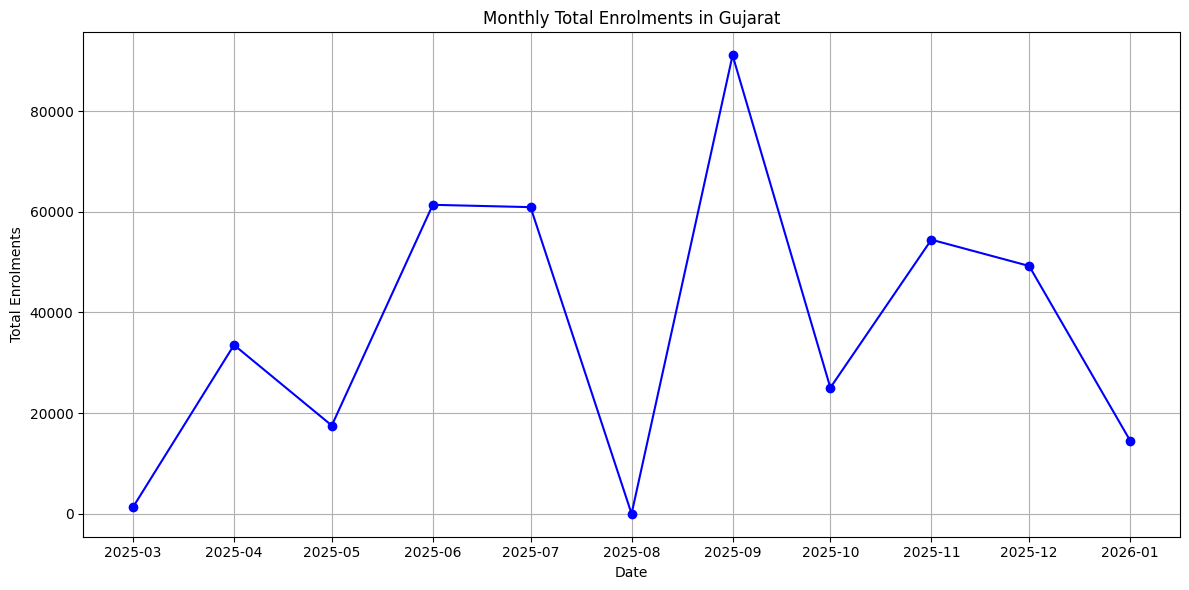

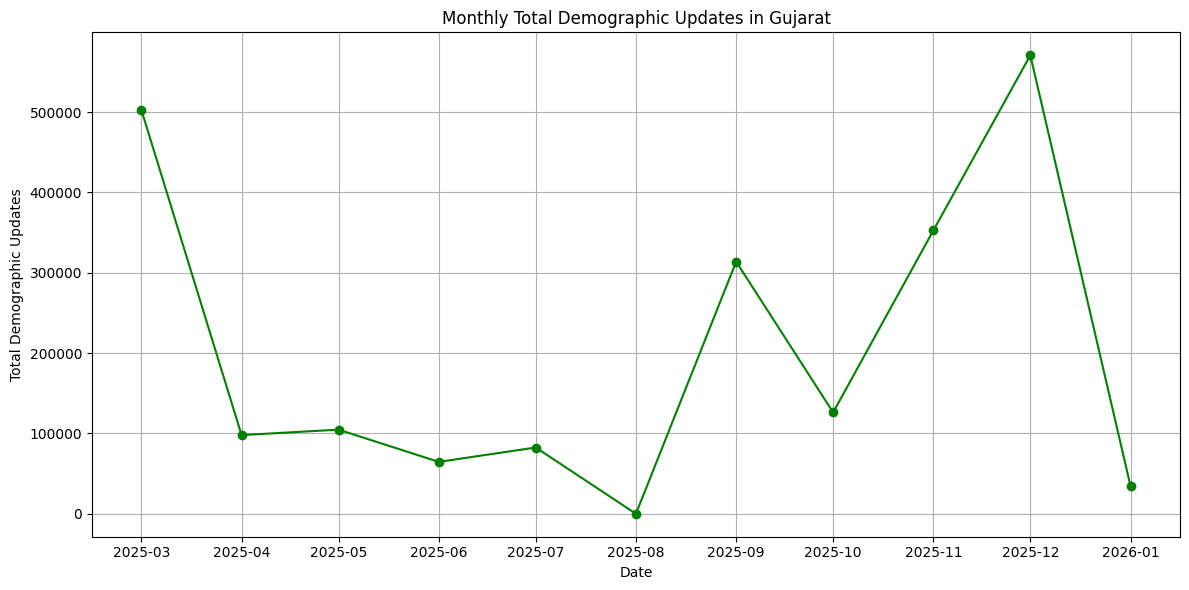

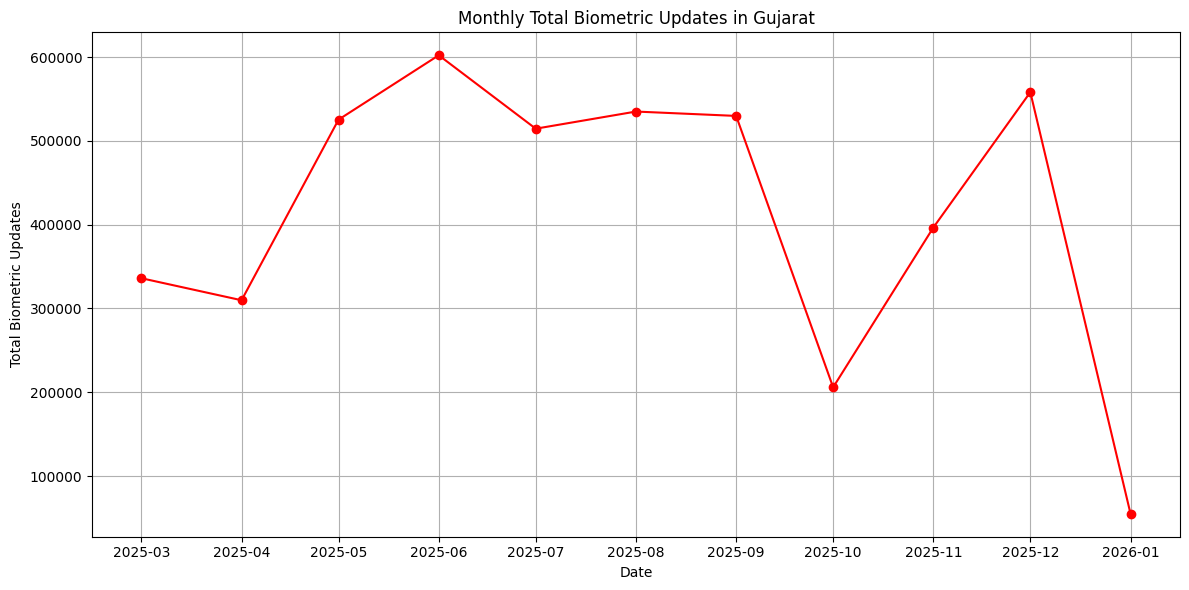

Monthly trend plots generated successfully for Gujarat.


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

df_gj_monthly_trends = df_gj_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_gj_monthly_trends['date'] = pd.to_datetime(df_gj_monthly_trends['year'].astype(str) + '-' + df_gj_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_gj_monthly_trends = df_gj_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_gj_monthly_trends['date'], df_gj_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Gujarat')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_gj_monthly_trends['date'], df_gj_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Gujarat')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_gj_monthly_trends['date'], df_gj_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Gujarat')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for Gujarat.")

**Univariate Analysis**

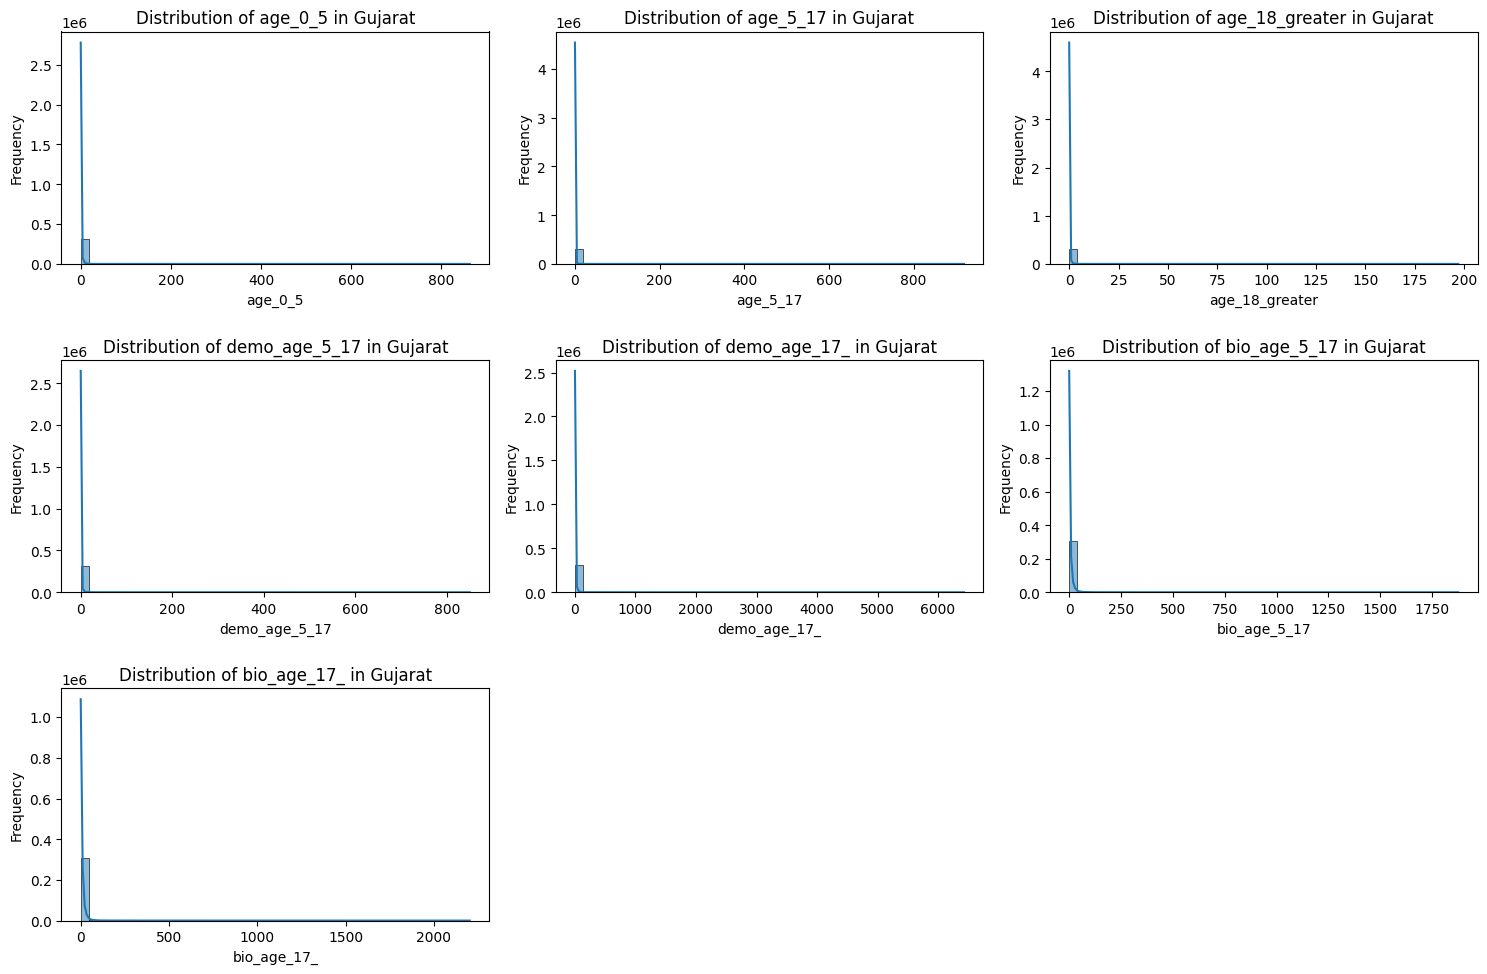

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_merged_gj[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Gujarat')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

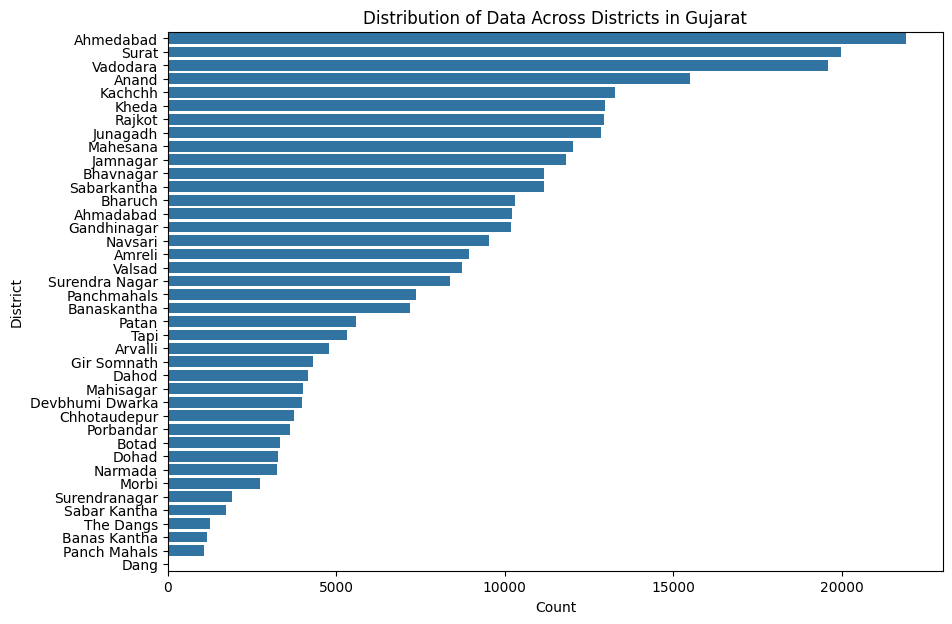

Histograms for numerical age-related columns and count plot for 'district' displayed for Gujarat.


In [141]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_merged_gj, y='district', order=df_merged_gj['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Gujarat')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Gujarat.")

**Bivariate and Trivariate Analysis**

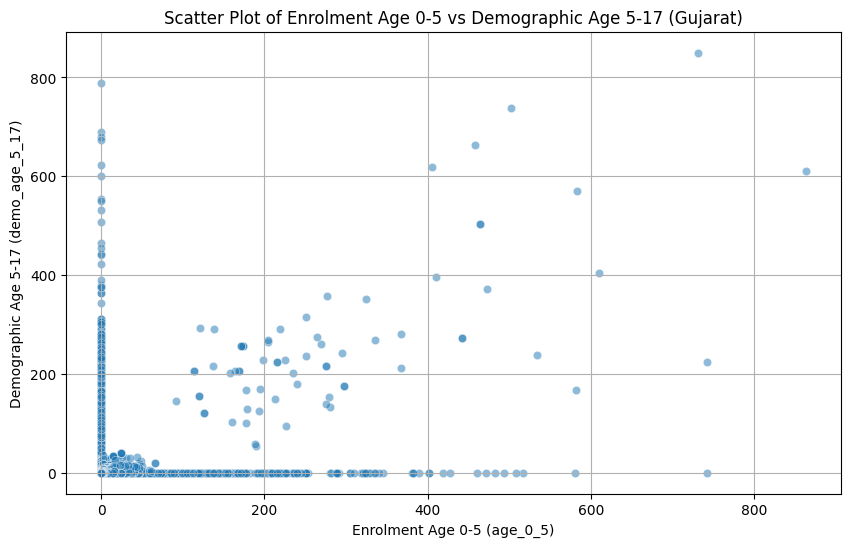

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Gujarat.


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_gj, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Gujarat)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Gujarat.")

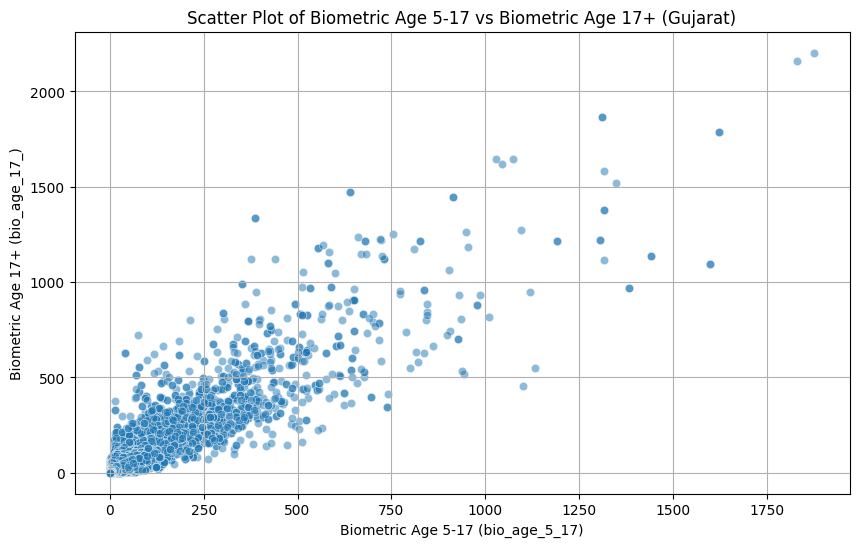

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Gujarat.


In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_gj, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Gujarat)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Gujarat.")

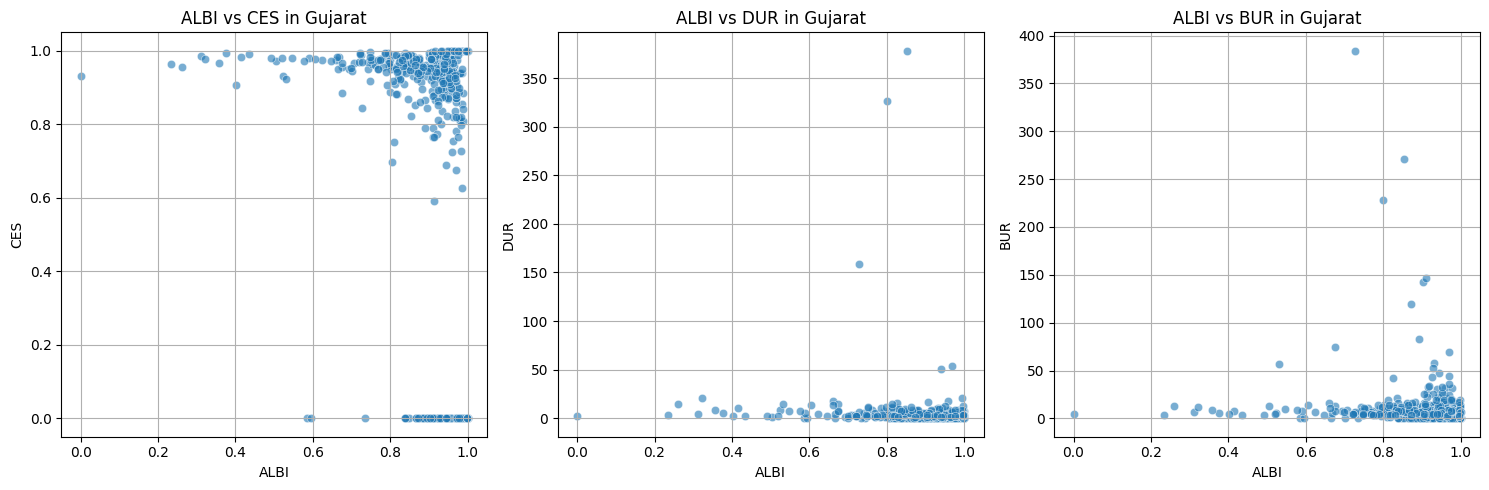

In [143]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_gj_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Gujarat')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

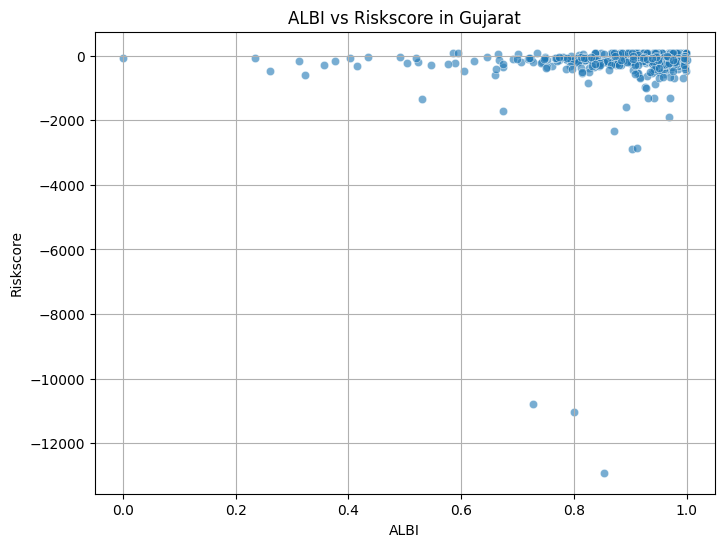

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Gujarat.


In [144]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_gj_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Gujarat')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Gujarat.")

Correlation Matrix for Gujarat:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.747762        0.615397       0.302863   
age_5_17        0.747762  1.000000        0.555461       0.169202   
age_18_greater  0.615397  0.555461        1.000000       0.143748   
demo_age_5_17   0.302863  0.169202        0.143748       1.000000   
demo_age_17_    0.355049  0.194701        0.168330       0.926124   
bio_age_5_17    0.243324  0.115504        0.263863       0.421519   
bio_age_17_     0.210519  0.106501        0.221355       0.428139   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.355049      0.243324     0.210519  
age_5_17            0.194701      0.115504     0.106501  
age_18_greater      0.168330      0.263863     0.221355  
demo_age_5_17       0.926124      0.421519     0.428139  
demo_age_17_        1.000000      0.408219     0.413714  
bio_age_5_17        0.408219      1.000000     0.905637  
bio_age_1

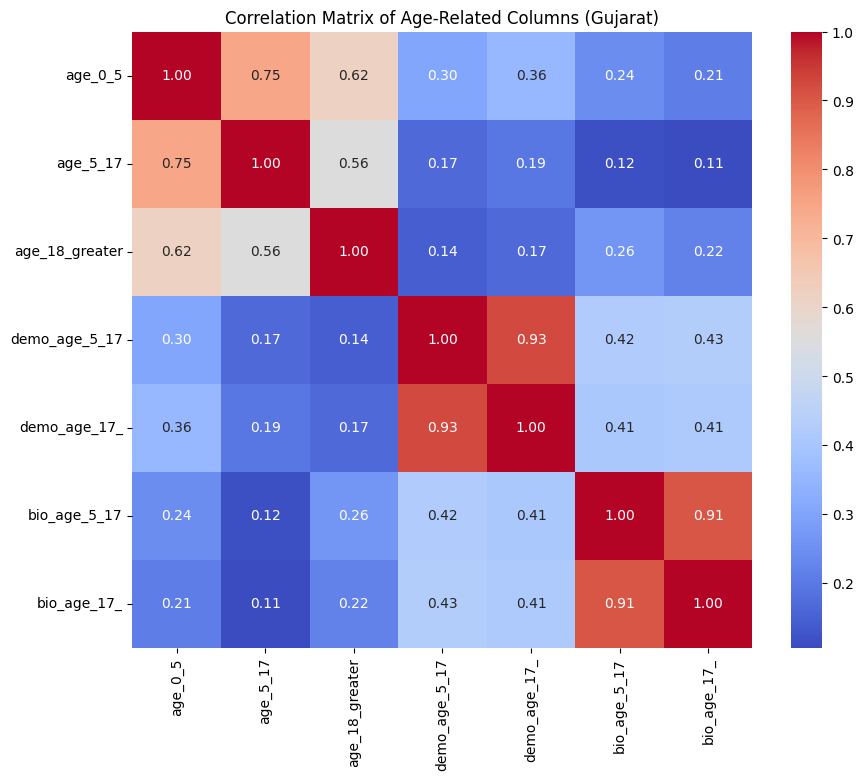

Correlation matrix heatmap for age-related columns displayed for Gujarat.


In [145]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_gj = df_merged_gj[numerical_age_cols].corr()

print("Correlation Matrix for Gujarat:")
print(correlation_matrix_gj)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_gj, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Gujarat)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Gujarat.")

Top 10 districts by total average age-related counts for Gujarat:
       district  total_avg_age
12         Dang     218.000000
11        Dahod      55.075531
6   Banaskantha      51.242728
1     Ahmedabad      41.424529
37    The Dangs      41.319063
33        Surat      40.978526
30       Rajkot      32.579171
27  Panchmahals      30.422337
23        Morbi      29.829857
28        Patan      27.996237


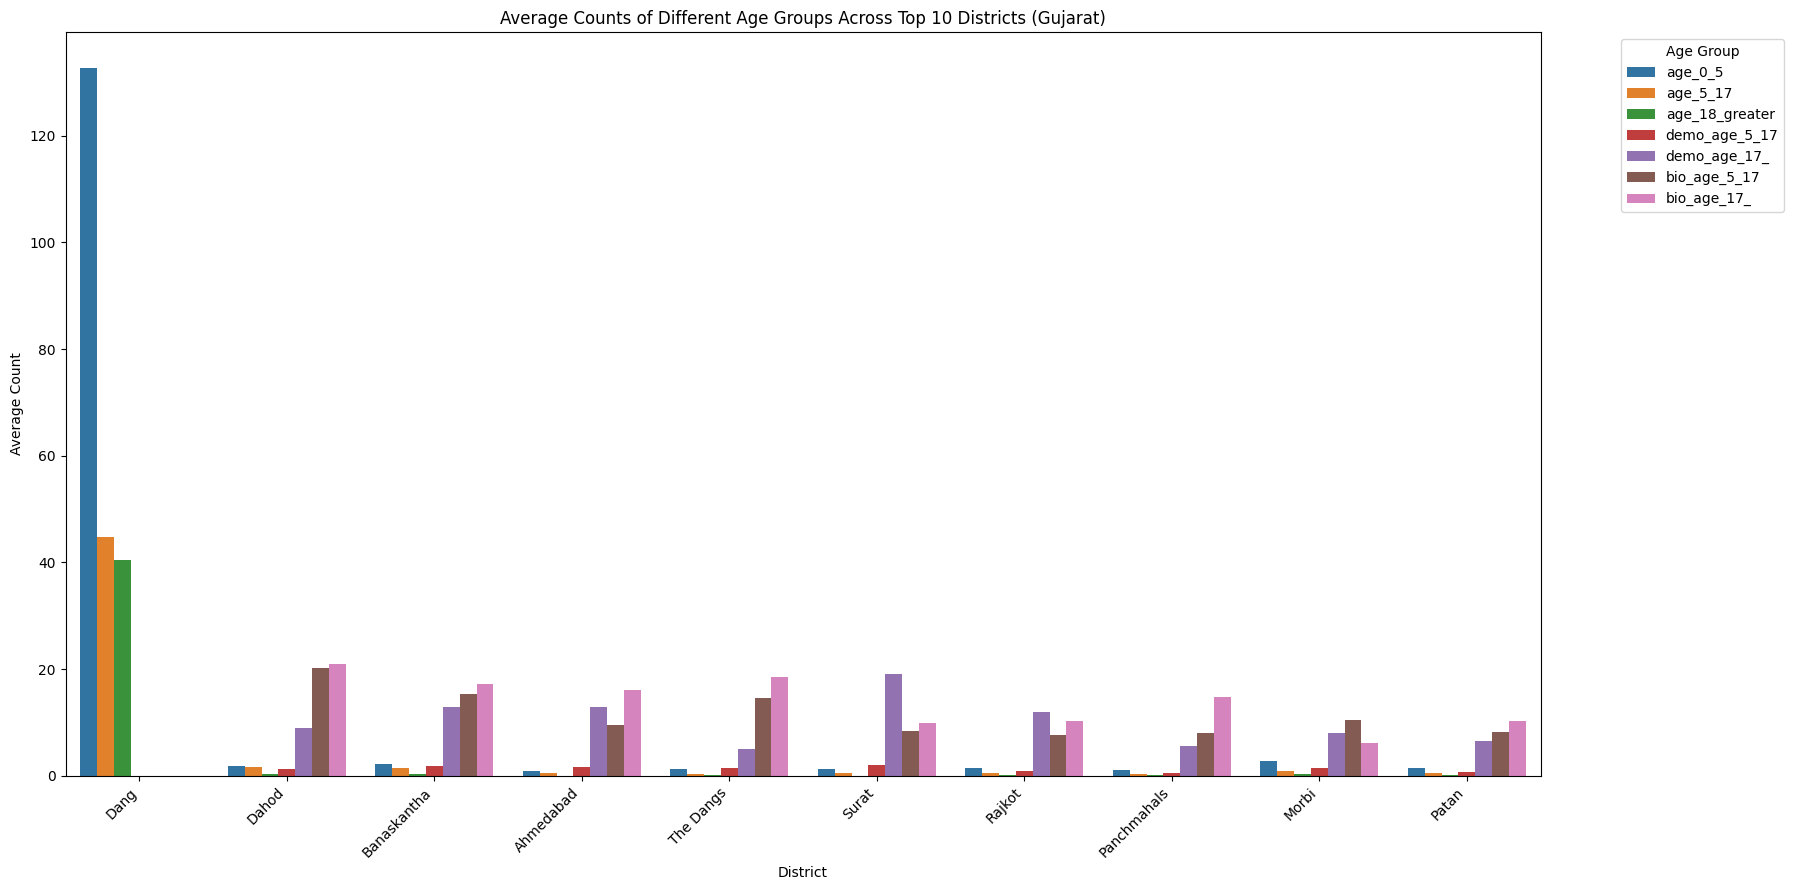

Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Gujarat, providing insights into their overall activity and the relative contribution of each age group.


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for grouping and summing
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group by district and calculate the mean of age-related columns for Gujarat
df_gj_district_mean = df_merged_gj.groupby('district')[age_cols_to_group].mean().reset_index()

# Calculate 'total_avg_age' for each district
df_gj_district_mean['total_avg_age'] = df_gj_district_mean[age_cols_to_group].sum(axis=1)

# Get the top 10 districts based on 'total_avg_age'
df_gj_district_mean_top10 = df_gj_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts for Gujarat:")
print(df_gj_district_mean_top10[['district', 'total_avg_age']])

# Melt the DataFrame for grouped bar chart plotting
df_gj_district_mean_melted = df_gj_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

# Create the grouped bar chart
plt.figure(figsize=(18, 9))
sns.barplot(data=df_gj_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Gujarat)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Gujarat, providing insights into their overall activity and the relative contribution of each age group.")

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 'date' column in df_gj_agg
df_gj_agg['date'] = pd.to_datetime(df_gj_agg['year'].astype(str) + '-' + df_gj_agg['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_gj_agg = df_gj_agg.sort_values(by='date')

# Define the age-related columns for plotting
age_cols_to_plot_gj = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

print("Time-series aggregated data (sum of age-related columns per date) for Gujarat:")
print(df_gj_agg.head())
print(df_gj_agg.info())

Time-series aggregated data (sum of age-related columns per date) for Gujarat:
    year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0   2025      3  Gujarat  Ahmadabad      0.0       0.0             0.0   
20  2025      3  Gujarat   Mahesana      0.0       0.0             0.0   
21  2025      3  Gujarat  Mahisagar      0.0       0.0             0.0   
22  2025      3  Gujarat      Morbi     36.0      12.0            23.0   
23  2025      3  Gujarat    Narmada      0.0       0.0             0.0   

    demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0             0.0           0.0          46.0  ...  0.009297  0.003099   
20         3031.0       14008.0        5945.0  ...  0.179701  0.126475   
21          282.0        2087.0        1978.0  ...  0.045613  0.024460   
22          786.0        3054.0        1982.0  ...  0.039043  0.030582   
23         1318.0        4622.0        1970.0  ...  0.077446  0.049024   

        ALBI  Enormrisk  CESris

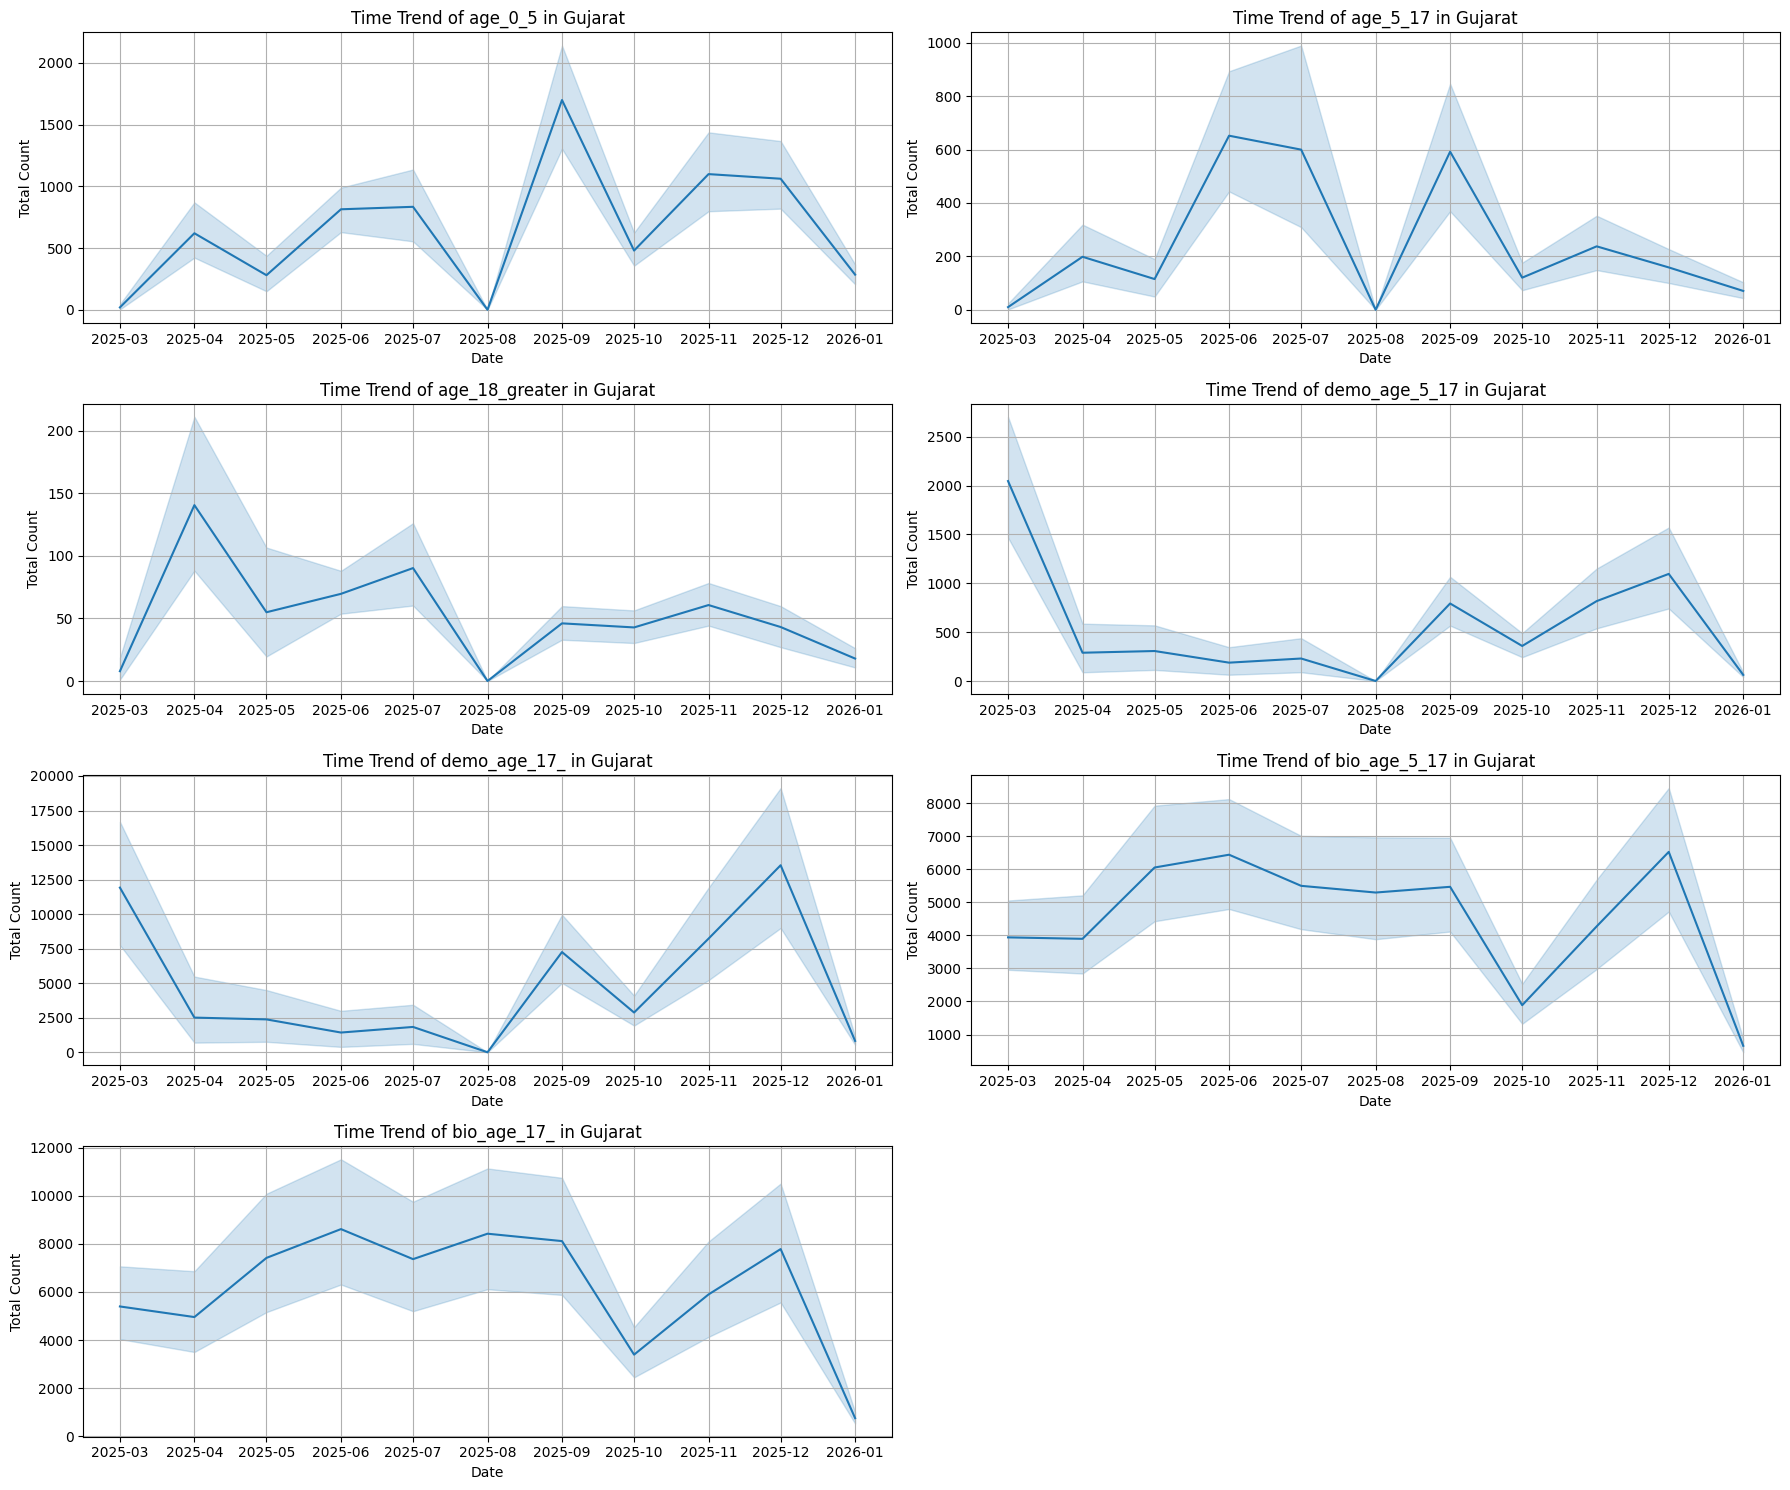

Insight: Line charts for each age-related column over time in Gujarat provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [148]:
# Create a set of line plots for each age-related column
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_plot_gj):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns (7 columns, so 4 rows, 2 columns)
    sns.lineplot(data=df_gj_agg, x='date', y=col)
    plt.title(f'Time Trend of {col} in Gujarat')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Gujarat provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

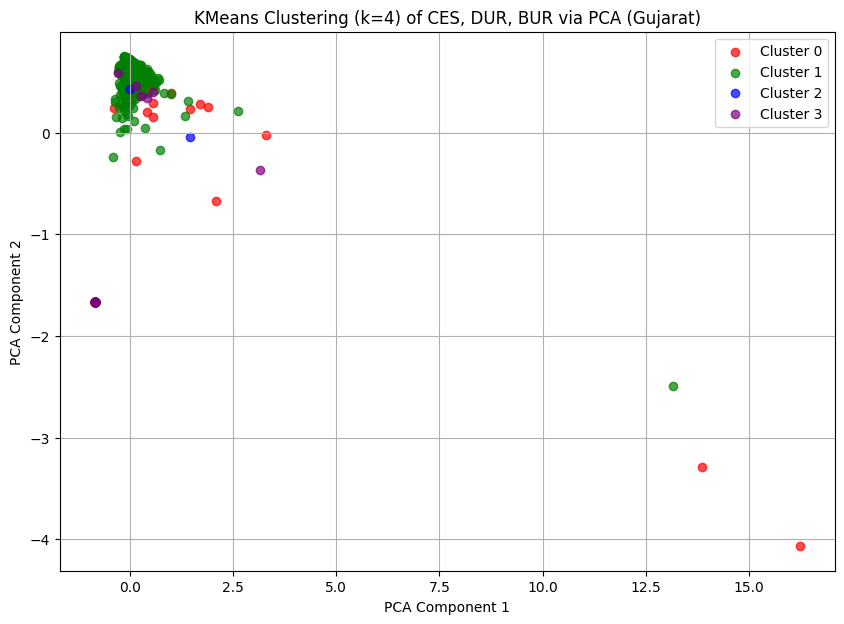

First 5 rows of df_gj_agg with 'clusterlabel' column:
    year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0   2025      3  Gujarat  Ahmadabad      0.0       0.0             0.0   
20  2025      3  Gujarat   Mahesana      0.0       0.0             0.0   
21  2025      3  Gujarat  Mahisagar      0.0       0.0             0.0   
22  2025      3  Gujarat      Morbi     36.0      12.0            23.0   
23  2025      3  Gujarat    Narmada      0.0       0.0             0.0   

    demo_age_5_17  demo_age_17_  bio_age_5_17  ...   stdnorm      ALBI  \
0             0.0           0.0          46.0  ...  0.003099  0.996901   
20         3031.0       14008.0        5945.0  ...  0.126475  0.873525   
21          282.0        2087.0        1978.0  ...  0.024460  0.975540   
22          786.0        3054.0        1982.0  ...  0.030582  0.969418   
23         1318.0        4622.0        1970.0  ...  0.049024  0.950976   

    Enormrisk  CESrisknorm  DURrisknorm  BURrisknorm  AL

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_gj_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_gj_agg
df_gj_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_gj_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Gujarat)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_gj_agg with 'clusterlabel' column:")
print(df_gj_agg.head())

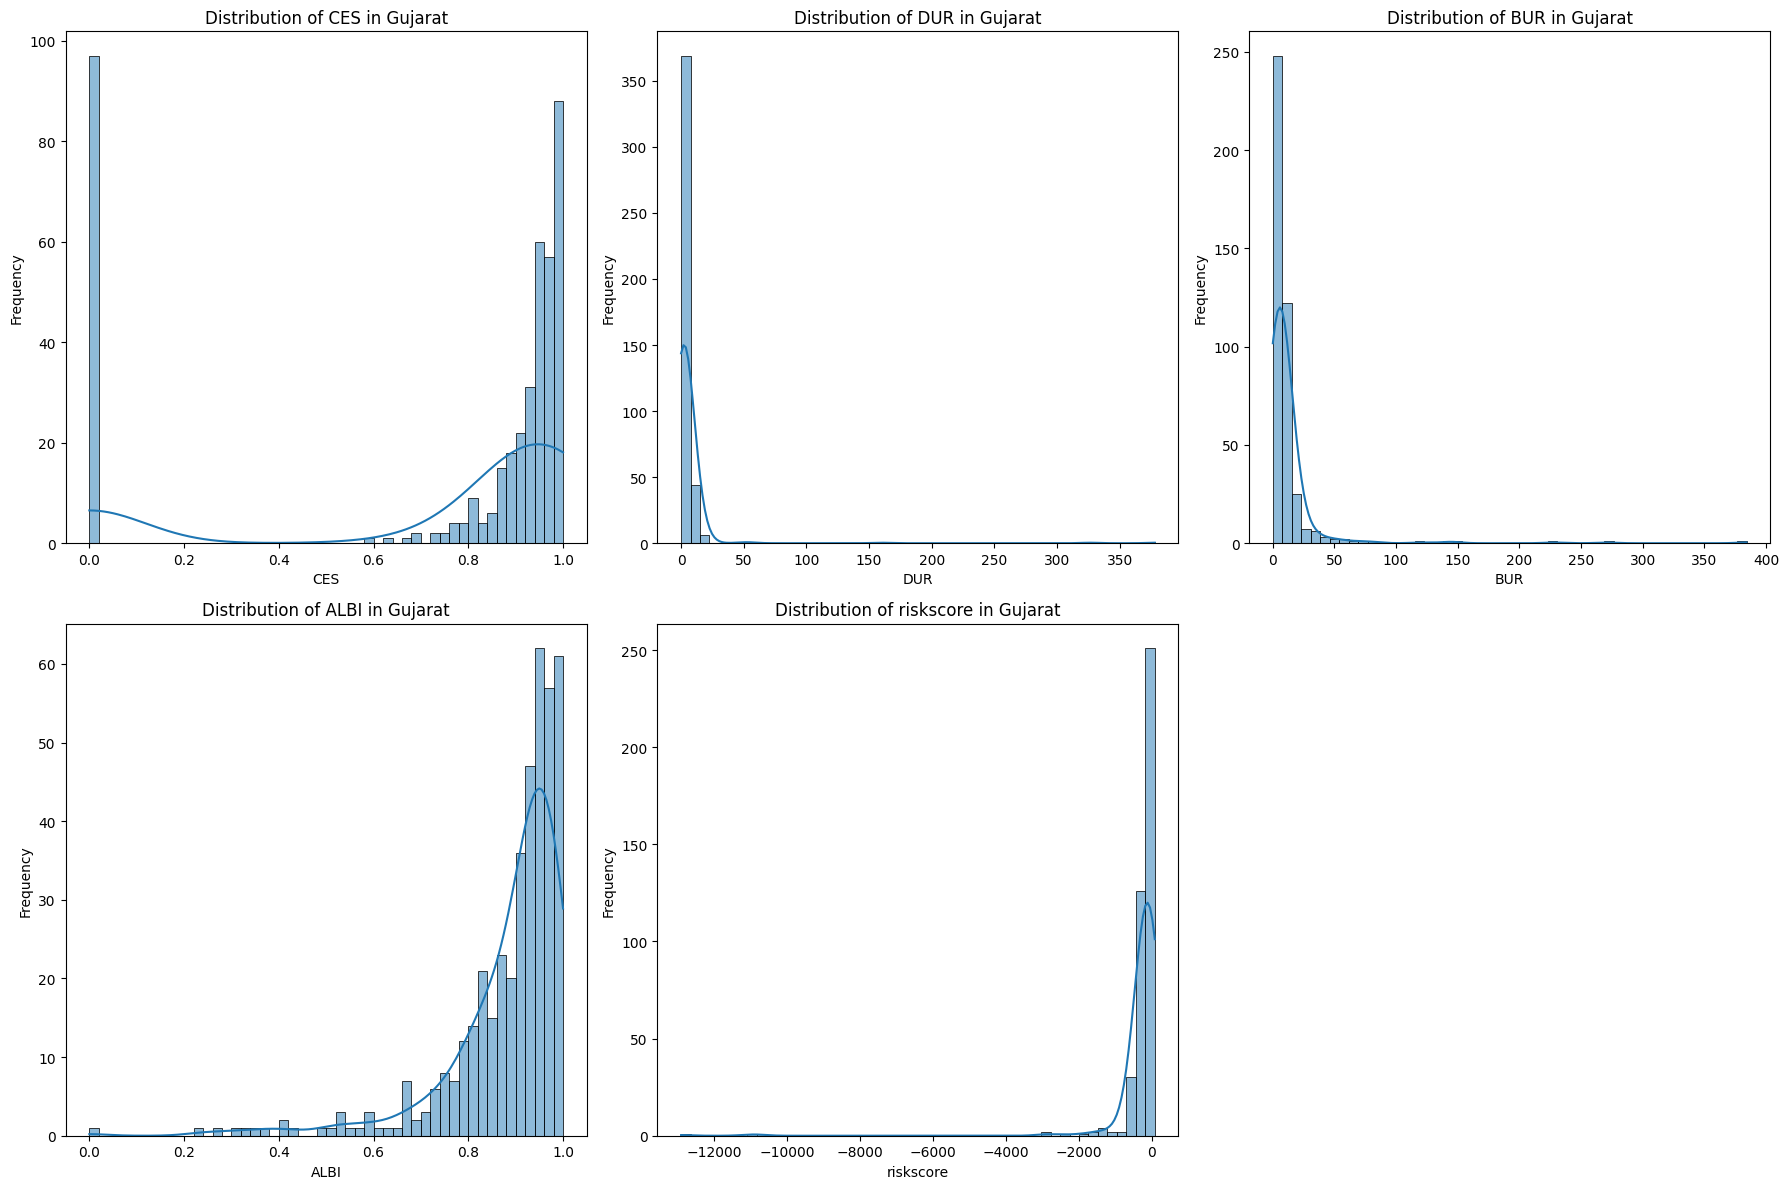

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Gujarat.


In [150]:
metrics_to_plot_gj = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot_gj):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_gj_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Gujarat')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Gujarat.")

In [151]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_gj_agg['year'].max()
latest_month = df_gj_agg[df_gj_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_gj_agg for the latest year and month
df_latest_month = df_gj_agg[(df_gj_agg['year'] == latest_year) & (df_gj_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
     district      CES
 Panch Mahals 1.000000
        Dohad 1.000000
    Ahmadabad 1.000000
    Porbandar 1.000000
Surendranagar 1.000000
 Sabar Kantha 1.000000
    The Dangs 1.000000
      Arvalli 1.000000
 Banas Kantha 1.000000
     Mahesana 0.997743

Bottom 10 Districts by CES (Year 2026, Month 1):
       district      CES
   Chhotaudepur 0.591837
        Narmada 0.852713
Devbhumi Dwarka 0.863636
    Gandhinagar 0.881868
       Vadodara 0.906414
          Anand 0.918455
          Botad 0.926471
      Ahmedabad 0.930699
    Gir Somnath 0.939189
          Patan 0.942424

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
     district      DUR
    Ahmadabad 3.823529
    Porbandar 3.819048
Surendranagar 3.777778
      Navsari 3.705036
 Sabar Kantha 3.500000
 Panch Mahals 3.500000
        Surat 3.369653
     Jamnagar 3.169643
  Sabarkantha 3.110256
    Ahmedaba

## Summary (Gujarat):

The Aadhaar lifecycle analysis for Gujarat provides a detailed view of enrolment and update activities across its districts. The `df_gj_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_merged_gj` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, several negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Districts like Ahmadabad, Banas Kantha, Arvalli, The Dangs, Porbandar, Sabar Kantha, Dohad, Surendranagar, and Panch Mahals achieved a perfect CES of 1.0. Chhotaudepur (0.592) and Narmada (0.853) had the lowest CES, indicating a lower proportion of child enrolments relative to total enrolments in the latest period.
    *   **DUR (Demographic Update Rate)**: Ahmadabad (3.82) and Porbandar (3.82) showed the highest DUR, suggesting strong demographic update activity relative to enrolments. Banas Kantha (0.818) and Chhotaudepur (0.865) had the lowest DURs.
    *   **BUR (Biometric Update Rate)**: The Dangs (8.06) and Panch Mahals (6.50) showed the highest BURs. Chhotaudepur (1.92) and Morbi (2.34) were among the lowest, indicating less frequent biometric updates relative to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Panch Mahals (1.0), Sabar Kantha (0.997), and Banas Kantha (0.997) exhibited the best balance, close to 1. Ahmedabad (0.0) and Surat (0.234) had the lowest balance.
    *   **Risk Score**: Chhotaudepur (11.27) showed the highest positive risk score. Similar to other states, a negative risk score was observed for a majority of districts in Gujarat, notably The Dangs (-145.20) and Panch Mahals (-140.00). This consistent issue across multiple states suggests a critical need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

### Conclusion:

Gujarat exhibits varied performance across its districts in Aadhaar lifecycle management. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The persistent issue with negative `riskscore` values across multiple states, including Gujarat, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.